In [3]:
import numpy as np
import pandas as pd
pd.set_option("precision", 3)
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
df = pd.read_csv('data/locogen.csv')

In [5]:
df['time'] = pd.to_datetime(df['time'])

In [6]:
df

,time,Asset Man,Board,Break,Cons,Energy,Lobby,Management,Meeting,Other (Kitchen),Sales,weather_temperature
0,2021-01-01 00:30:00,18.2,20.2,14.1,18.5,19.2,18.1,18.1,18.9,17.6,20.1,2.59
1,2021-01-01 01:00:00,18.2,21.4,14.2,18.6,18.4,18.1,18.8,19.0,17.6,19.4,2.44
2,2021-01-01 01:30:00,18.4,20.7,14.2,18.8,17.4,18.1,18.0,19.0,17.0,18.7,2.31
3,2021-01-01 02:00:00,18.2,20.0,14.2,18.7,16.8,18.1,17.5,18.8,16.6,18.0,2.17
4,2021-01-01 02:30:00,18.3,19.3,14.2,18.7,16.4,18.0,17.1,18.8,16.3,17.6,1.90
...,...,...,...,...,...,...,...,...,...,...,...,...
5688,2021-04-29 21:30:00,20.5,19.6,18.1,21.6,17.7,18.0,18.9,15.4,18.6,18.1,5.06
5689,2021-04-29 22:00:00,20.3,19.5,18.0,21.4,17.5,17.7,18.8,15.4,18.4,18.0,4.77
5690,2021-04-29 22:30:00,20.2,19.4,18.0,21.2,17.5,17.6,18.7,15.2,18.3,18.0,4.67
5691,2021-04-29 23:00:00,20.2,19.2,18.1,21.3,17.7,18.5,18.6,15.6,18.3,18.0,4.46


In [7]:
cols = ['Asset Man', 'Board', 'Break', 'Cons', 'Energy', 'Lobby',
       'Management', 'Meeting', 'Other (Kitchen)', 'Sales',
       'weather_temperature']

In [8]:
df.describe()

,Asset Man,Board,Break,Cons,Energy,Lobby,Management,Meeting,Other (Kitchen),Sales,weather_temperature
count,5649.000,5647.000,5655.000,5636.000,5654.000,5646.000,5661.000,5643.000,5619.000,5648.000,5693.000
mean,14.459,12.771,11.966,14.986,12.791,12.792,12.948,10.765,12.179,13.258,4.950
std,5.536,5.549,5.270,5.704,5.353,5.150,5.125,5.030,5.946,5.390,3.878
min,5.700,4.000,4.400,5.800,5.300,5.700,4.600,3.700,3.500,5.700,-5.240
25%,8.500,6.700,6.200,8.800,7.500,7.600,7.200,5.800,5.700,8.100,2.120
50%,15.800,13.700,11.800,16.650,12.100,12.300,14.100,10.200,11.700,12.500,4.740
75%,19.300,17.500,17.500,20.100,17.500,18.000,17.600,15.500,18.100,18.100,7.520
max,24.300,24.800,19.100,23.900,22.700,20.700,22.700,20.300,21.700,22.600,16.210


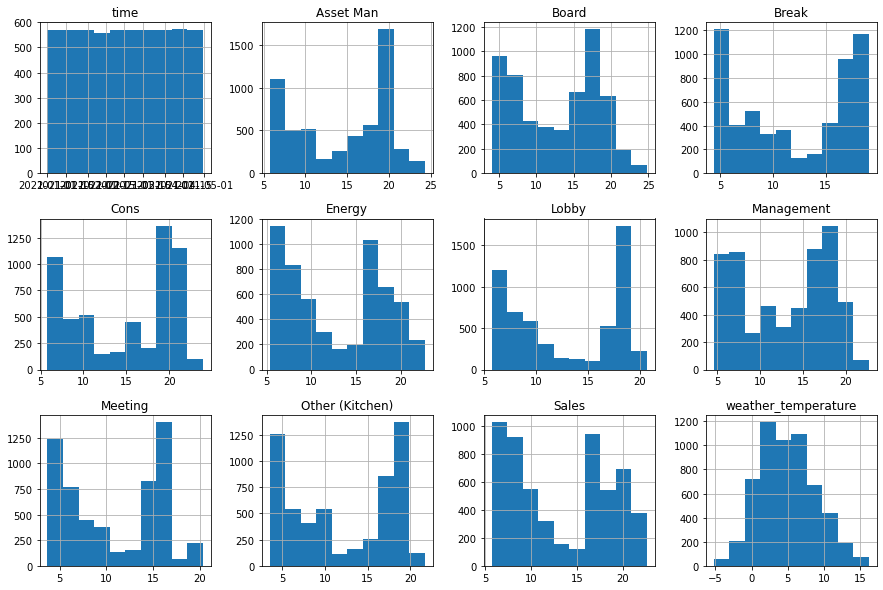

In [9]:
fig, ax = plt.subplots(3,4, figsize=(15,10))
df.hist(ax=ax.ravel());

In [10]:
from matplotlib import cm

[Text(0, 0.5, 'Temperature (C)'), (18704.4375, 18710.25)]

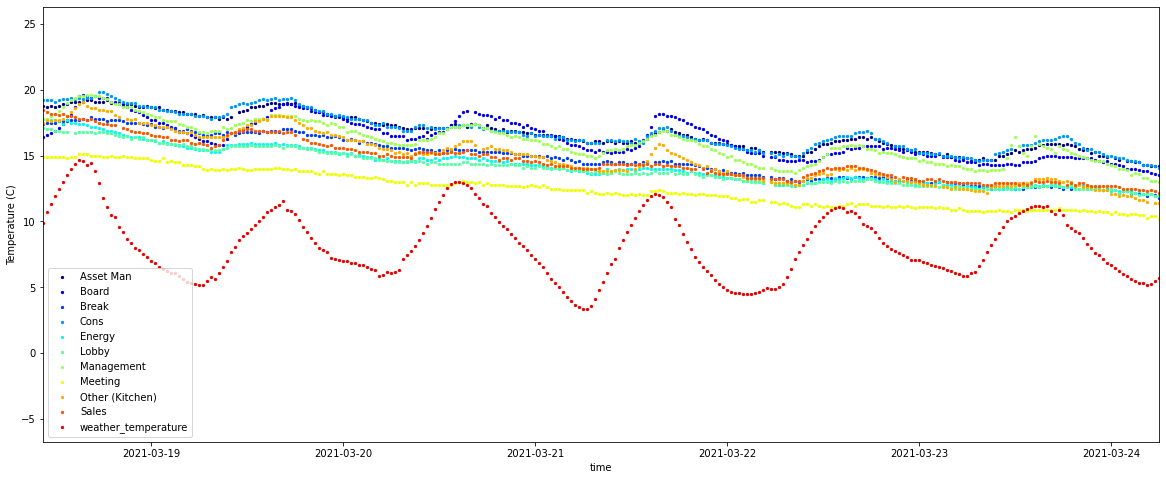

In [52]:
# define two time ranges to plot over
fmt = '%Y-%m-%dT%H:%M:%S.%f'
xlim1 = [datetime.strptime(time, fmt) for time in ['2021-01-01T00:00:00.00','2021-02-15T00:00:00.00']]
xlim2 = [datetime.strptime(time, fmt) for time in ['2021-03-18T10:30:00.00','2021-03-24T06:00:00.00']]
fig, ax = plt.subplots(1,1, figsize=(20,8))
n = len(cols)
cmap = cm.get_cmap('jet')
for i, col in enumerate(cols):
    df.plot(x='time', y=col, kind='scatter', s=5, ax=ax, label=col, color=cmap(i/n))
# ax2 = ax.twinx()
# df.plot(x='time', y='gas', kind='scatter', s=5, ax=ax2, color='y', label='gas')
ax.set(ylabel = 'Temperature (C)', xlim=xlim2)
# ax.legend()

In [50]:
df['time'][3650:3930]

3650   2021-03-18 10:30:00
3651   2021-03-18 11:00:00
3652   2021-03-18 11:30:00
3653   2021-03-18 12:00:00
3654   2021-03-18 12:30:00
               ...        
3925   2021-03-24 04:00:00
3926   2021-03-24 04:30:00
3927   2021-03-24 05:00:00
3928   2021-03-24 05:30:00
3929   2021-03-24 06:00:00
Name: time, Length: 280, dtype: datetime64[ns]